In [1]:
import pandas as pd
import re
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [6]:
data_high_bound = 30
data_low_bound = -20
need_to_normalized = False

data = pd.read_excel('./dataset/rt_df_thermo1.xlsx')
print(data.head())

print(f"max = {data['the thermal expansion'].max()}")
print(f"min = {data['the thermal expansion'].min()}")

in_range_count = data[(data['the thermal expansion'] >= -20) & (data['the thermal expansion'] <= 30)].shape[0]

# 计算总数
total_count = data.shape[0]

# 计算比例
proportion = in_range_count / total_count
print(proportion)

   ID               formula  the thermal expansion       Normalized_Formulas
0   1                 Fe3Ni                  14.00          Fe0.7500Ni0.2500
1   2         Fe3Ni0.5Pt0.5                  16.80  Fe0.7500Ni0.1250Pt0.1250
2   3                 Fe3Pt                 -30.00          Fe0.7500Pt0.2500
3   4          Fe0.75Pt0.25                 -26.00          Fe0.7500Pt0.2500
4   5  Fe0.75Ni0.125Pt0.125                  11.37  Fe0.7500Ni0.1250Pt0.1250
max = 4600.0
min = -590.0
0.8753180661577609


In [29]:
# 函数：解析化学成分及其比例
from collections import defaultdict
def parse_normalized_formulas(formula):
    """
    将Normalized_Formulas解析为化学成分及其比例。
    返回一个字典，键为化学成分，值为比例。
    """
    element_count = defaultdict(float)
    elements = re.findall(r'([A-Z][a-z]*)(\d*\.?\d+)', formula)
    for element, ratio in elements:
        # 如果没有数量则默认为1
        count = float(ratio) if ratio else 1.0
        element_count[element] += count
    return dict(element_count)
    # return {element: float(ratio) for element, ratio in elements}

In [30]:
# 提取所有化学成分
all_elements = set()
for formula in data['Normalized_Formulas']:
    parsed = parse_normalized_formulas(formula)
    all_elements.update(parsed.keys())

In [31]:
all_elements

{'Al',
 'As',
 'B',
 'Ba',
 'Bi',
 'Br',
 'C',
 'Ca',
 'Cd',
 'Ce',
 'Co',
 'Cr',
 'Cs',
 'Cu',
 'Dy',
 'Er',
 'Eu',
 'F',
 'Fe',
 'Ga',
 'Gd',
 'Ge',
 'H',
 'Hf',
 'Ho',
 'I',
 'In',
 'K',
 'La',
 'Li',
 'Lu',
 'Mg',
 'Mn',
 'Mo',
 'N',
 'Nb',
 'Nd',
 'Ni',
 'O',
 'Os',
 'P',
 'Pb',
 'Pr',
 'Pt',
 'Rb',
 'Re',
 'Rh',
 'Ru',
 'S',
 'Sb',
 'Sc',
 'Se',
 'Si',
 'Sm',
 'Sn',
 'Sr',
 'Ta',
 'Tb',
 'Te',
 'Ti',
 'V',
 'W',
 'Y',
 'Yb',
 'Zn',
 'Zr'}

In [32]:
# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    data[element] = data['Normalized_Formulas'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

In [33]:
data.head()

,ID,formula,the thermal expansion,Normalized_Formulas,Al,As,B,Ba,Bi,Br,...,Ta,Tb,Te,Ti,V,W,Y,Yb,Zn,Zr
0,1,Fe3Ni,14.00,Fe0.7500Ni0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Fe3Ni0.5Pt0.5,16.80,Fe0.7500Ni0.1250Pt0.1250,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Fe3Pt,-30.00,Fe0.7500Pt0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Fe0.75Pt0.25,-26.00,Fe0.7500Pt0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Fe0.75Ni0.125Pt0.125,11.37,Fe0.7500Ni0.1250Pt0.1250,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df = data.copy()
df = df.drop('formula', axis=1)
df = df.drop('Normalized_Formulas', axis=1)
df = df.drop('ID', axis=1)
df.head()

,the thermal expansion,Al,As,B,Ba,Bi,Br,C,Ca,Cd,...,Ta,Tb,Te,Ti,V,W,Y,Yb,Zn,Zr
0,14.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-30.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-26.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

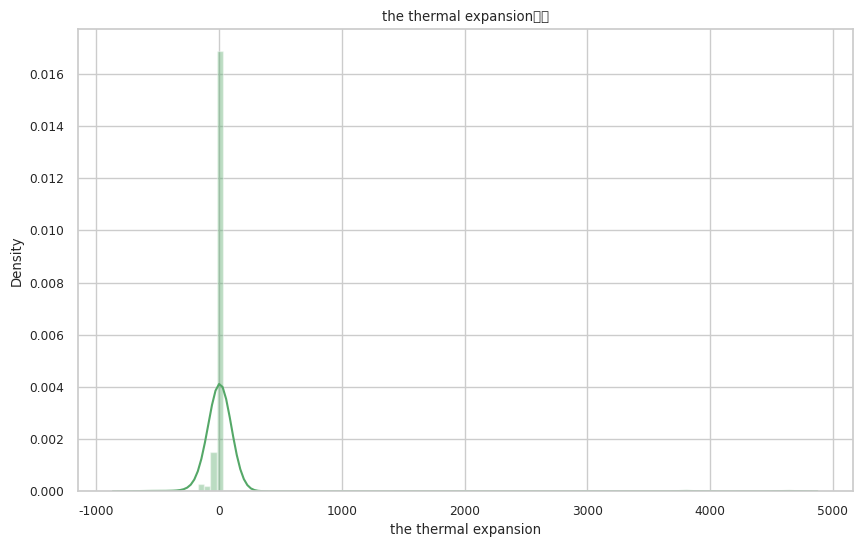

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

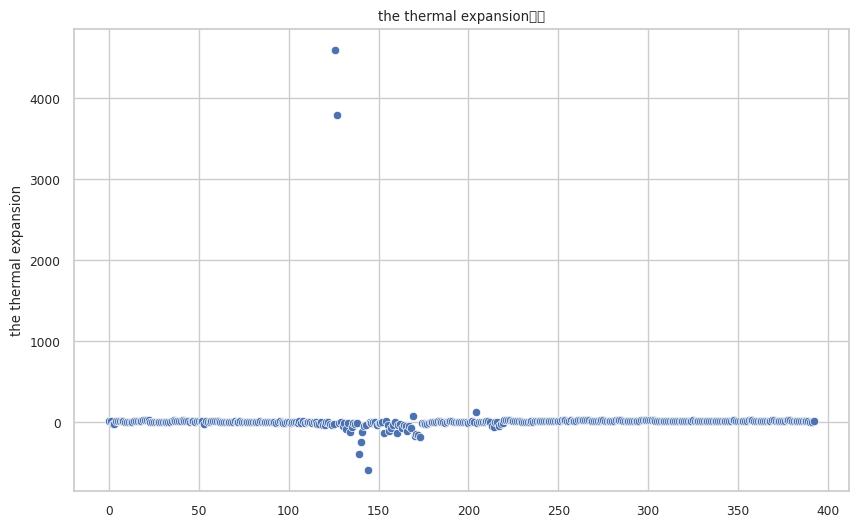

In [35]:
import class_plotpicture as pl
# 绘制目标特征的条形图
pl.plot_prediction_feature(df, 'the thermal expansion', 'ImageOfThermal')

# 可见需要把大于3000的视为异常值

In [36]:
# 删除 'the thermal expansion' 列中大于 3000 的行
df_cleaned = df[df['the thermal expansion'] <= data_high_bound]

In [37]:
# 删除 'the thermal expansion' 列中小于 -200 的行
df_cleaned = df_cleaned[df_cleaned['the thermal expansion'] >= data_low_bound]

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

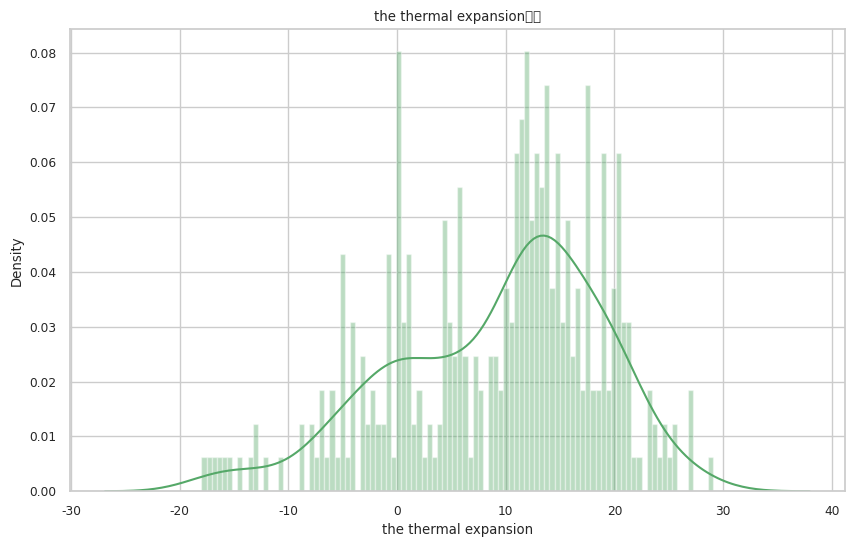

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

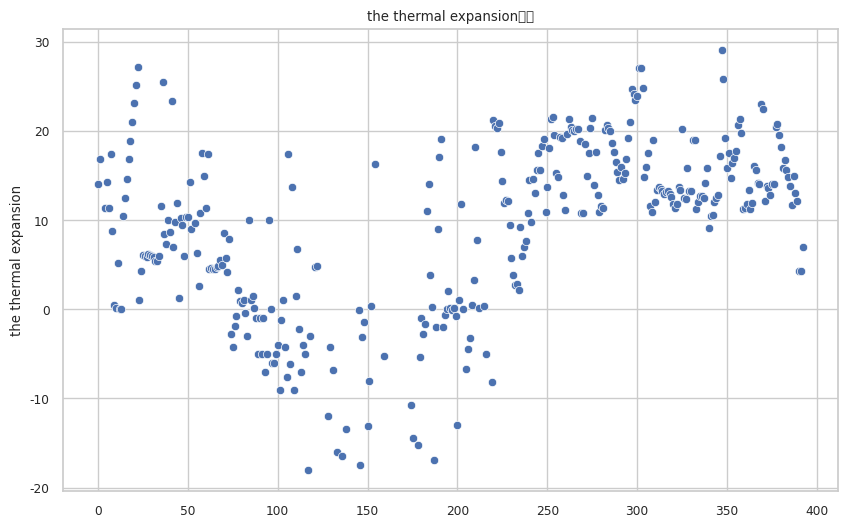

In [38]:
import class_plotpicture as pl

# 绘制目标特征的条形图
pl.plot_prediction_feature(df_cleaned, 'the thermal expansion', 'ImageOfThermal')

# 大致符合正态分布

# 划分数据，进行训练和测试

In [39]:
all_features = df_cleaned.drop('the thermal expansion', axis=1)
all_labels = df_cleaned['the thermal expansion']
print(f'全部的特征：{all_features.shape}')
print(f'全部的标签：{all_labels.shape}')

全部的特征：(344, 66)
全部的标签：(344,)


In [40]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# 标准化特征
scaler = StandardScaler()
all_labels_scaler = scaler.fit_transform(np.array(all_labels).reshape(-1, 1))

In [41]:
from sklearn.model_selection import train_test_split
# 将总的数据集分开
if need_to_normalized:
    X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels_scaler, test_size=0.2, random_state=42)
else:
    X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)
print(f'训练集的特征：{X_train.shape}, 标签：{y_train.shape}')
print(f'测试集的特征：{X_test.shape}, 标签：{y_test.shape}')

训练集的特征：(275, 66), 标签：(275,)
测试集的特征：(69, 66), 标签：(69,)


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
# 创建随机森林分类器对象
# clf = RandomForestRegressor(random_state=42, n_estimators=2, max_features=38, min_samples_leaf=1, max_depth=29)
# clf = RandomForestRegressor(random_state=42, n_estimators=66, max_features=6, min_samples_leaf=1, max_depth=41)
# clf = RandomForestRegressor(random_state=42, n_estimators=38, max_features=20, min_samples_leaf=1, max_depth=24)
clf = RandomForestRegressor(random_state=42, n_estimators=15, max_features=1, min_samples_leaf=1, max_depth=43)
# 在训练集上拟合模型
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
# 对测试集进行预测
label_pred = clf.predict(X_test)
# 计算MSE(平均误差)和精确度
mse = mean_squared_error(y_test, label_pred)
r2 = r2_score(y_test, label_pred)
# 输出模型评估结果和目标方程
print(f'MSE:{mse:.5f}')
print(f"R2: {r2:.5f}")

MSE:15.64515
R2: 0.84083


# 预测3

In [21]:
data = pd.read_excel('./dataset/to_predict_3.xlsx')
print(data.head())

              MP Formula           pretty_formula
0  mp-1001581       LiC6          Li0.1429C0.8571
1  mp-1001784     LiTiS2  Li0.2500Ti0.2500S0.5000
2  mp-1001787      LiRh3         Li0.2500Rh0.7500
3  mp-1001790       LiO3          Li0.2500O0.7500
4  mp-1001825       LiBe         Li0.5000Be0.5000


In [25]:
data_raw = pd.read_excel('./dataset/to_predict_3.xlsx')
data = data_raw[['pretty_formula']]
print(data.head())

# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    data[element] = data['pretty_formula'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

data = data.drop('pretty_formula', axis=1)
print(data.head())

pred = clf.predict(data)

print(f'pred: {pred}')
print(type(pred))

# 结果保存为文件
pred_df = pd.DataFrame(pred, columns=['thermal expansion predict'])

data_result = pd.concat([data_raw, pred_df], axis=1)

data_result.to_excel('./dataset/to_predict_3_result.xlsx', index=False)

            pretty_formula
0          Li0.1429C0.8571
1  Li0.2500Ti0.2500S0.5000
2         Li0.2500Rh0.7500
3          Li0.2500O0.7500
4         Li0.5000Be0.5000
    Al   As    B   Ba   Bi   Br       C   Ca   Cd   Ce  ...   Ta   Tb   Te  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.8571  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     Ti    V    W    Y   Yb   Zn   Zr  
0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.25  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.00  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.00  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.00  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 66 columns]
pred: [ 7.37799006  9.25211852 10.97202339 ... 11.903      11.903
 11.94633333]
<class 'numpy.ndarray'>
  

# 预测

In [62]:
# 预测
lmo_data = {
    'Normalized_Formulas': [
        'Li0.25O0.75', 
        'Li0.1667V0.1667F0.6667',
        f'Li{round(1/8, 4)}V{round(1/8, 4)}F{round(6/8, 4)}',
        f'Li{round(1/10, 4)}Fe{round(2/10, 4)}F{round(7/10, 4)}'
        ]
}

# 根据字典初始化 DataFrame
lmo_data = pd.DataFrame(lmo_data)

# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    lmo_data[element] = lmo_data['Normalized_Formulas'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

print(lmo_data)

lmo_data = lmo_data.drop('Normalized_Formulas', axis=1)
print(lmo_data)

lmo_pred = clf.predict(lmo_data)

print(f'lmo_pred: {lmo_pred}')

if need_to_normalized:
    # 将数据反归一化（归一化是 fit_transform
    salered_lmo_pred = scaler.inverse_transform(lmo_pred.reshape(-1,1))
    print(f'salered_lmo_pred: {salered_lmo_pred}')

      Normalized_Formulas  Al  As  B  Ba  Bi  Br  C  Ca  Cd  ...  Ta  Tb  Te  \
0             Li0.25O0.75   0   0  0   0   0   0  0   0   0  ...   0   0   0   
1  Li0.1667V0.1667F0.6667   0   0  0   0   0   0  0   0   0  ...   0   0   0   
2      Li0.125V0.125F0.75   0   0  0   0   0   0  0   0   0  ...   0   0   0   
3          Li0.1Fe0.2F0.7   0   0  0   0   0   0  0   0   0  ...   0   0   0   

   Ti       V  W  Y  Yb  Zn  Zr  
0   0  0.0000  0  0   0   0   0  
1   0  0.1667  0  0   0   0   0  
2   0  0.1250  0  0   0   0   0  
3   0  0.0000  0  0   0   0   0  

[4 rows x 66 columns]
   Al  As  B  Ba  Bi  Br  C  Ca  Cd  Ce  ...  Ta  Tb  Te  Ti       V  W  Y  \
0   0   0  0   0   0   0  0   0   0   0  ...   0   0   0   0  0.0000  0  0   
1   0   0  0   0   0   0  0   0   0   0  ...   0   0   0   0  0.1667  0  0   
2   0   0  0   0   0   0  0   0   0   0  ...   0   0   0   0  0.1250  0  0   
3   0   0  0   0   0   0  0   0   0   0  ...   0   0   0   0  0.0000  0  0   

   Yb  Zn  Zr  

# 预测LATP

In [48]:
latp_data_raw = pd.read_excel('./dataset/pred33Ti.xlsx')
latp_data = latp_data_raw[['pretty_formula']]
print(latp_data.head())

# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    latp_data[element] = latp_data['pretty_formula'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

latp_data = latp_data.drop('pretty_formula', axis=1)
print(latp_data.head())

latp_pred = clf.predict(latp_data)

print(f'latp_pred: {latp_pred}')

# sorted_latp_pred = sorted(latp_pred, reverse=True)
# print(f'sorted_latp_pred: {sorted_latp_pred}')

target = 7.77845455
closest_numbers = find_closest_numbers(latp_pred, target, 50)

# 打印与目标值最接近的n个数字及其索引
for diff, index, number in closest_numbers:
    print(f"化学式: {latp_data_raw['pretty_formula'][index]}, 预测结果: {number}, 与 {target} 的差: {diff}, 索引: {index}, ")

if need_to_normalized:
    # 将数据反归一化（归一化是 fit_transform
    salered_latp_pred = scaler.inverse_transform(latp_pred.reshape(-1,1))
    print(f'salered_latp_pred: {salered_latp_pred}')
    sorted_salered_latp_pred = sorted(salered_latp_pred)
    print(f'sorted_salered_latp_pred: {sorted_salered_latp_pred}')


                                pretty_formula
0     Li0.0556Al0.0Al0.0Ti0.1111P0.1667O0.6667
1  Li0.0642Al0.0Al0.0092Ti0.1009P0.1651O0.6605
2  Li0.0642Al0.0092Al0.0Ti0.1009P0.1651O0.6605
3  Li0.0727Al0.0Al0.0182Ti0.0909P0.1636O0.6545
4  Li0.0727Al0.0182Al0.0Ti0.0909P0.1636O0.6545
       Al   As    B  Ba   Bi  Br  C  Ca  Cd  Ce  ...  Ta  Tb  Te      Ti  V  \
0  0.0000  0.0  0.0   0  0.0   0  0   0   0   0  ...   0   0   0  0.1111  0   
1  0.0092  0.0  0.0   0  0.0   0  0   0   0   0  ...   0   0   0  0.1009  0   
2  0.0092  0.0  0.0   0  0.0   0  0   0   0   0  ...   0   0   0  0.1009  0   
3  0.0182  0.0  0.0   0  0.0   0  0   0   0   0  ...   0   0   0  0.0909  0   
4  0.0182  0.0  0.0   0  0.0   0  0   0   0   0  ...   0   0   0  0.0909  0   

   W    Y  Yb  Zn  Zr  
0  0  0.0   0   0   0  
1  0  0.0   0   0   0  
2  0  0.0   0   0   0  
3  0  0.0   0   0   0  
4  0  0.0   0   0   0  

[5 rows x 65 columns]
latp_pred: [2.86971919 2.61714343 2.61714343 ... 5.9234596  5.9234596  5.923

# 预测LATP（带离子电导率预测）

In [54]:
latp_with_conductivity_data_raw = pd.read_csv('./dataset/pred33Ti_with_conductivity_prediction.csv', header=None)

latp_conductivity_column = latp_with_conductivity_data_raw.iloc[:, 1].reset_index(drop=True)
latp_original_formula_column = latp_with_conductivity_data_raw.iloc[:, 19].reset_index(drop=True)

# 归一化化学式
from utils import normalize_chemical_formula
latp_formula_column = latp_original_formula_column.apply(lambda x: normalize_chemical_formula(x))

latp_formula_column.name = 'pretty_formula'
latp_data = pd.DataFrame(latp_formula_column)
print(latp_data.head())

# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    latp_data[element] = latp_data['pretty_formula'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

latp_data = latp_data.drop('pretty_formula', axis=1)
print(latp_data.head())

latp_pred = clf.predict(latp_data)

print(f'latp_pred: {latp_pred}')

if need_to_normalized:
    # 将数据反归一化（归一化是 fit_transform
    salered_latp_pred = scaler.inverse_transform(latp_pred.reshape(-1,1))
    print(f'salered_latp_pred: {salered_latp_pred}')

                                  pretty_formula
0  Li0.1053B0.0439Ga0.0088Ti0.0526P0.1579O0.6316
1         Li0.0642Al0.0092Ti0.1009P0.1651O0.6605
2         Li0.0642Al0.0092Ti0.1009P0.1651O0.6605
3         Li0.0727Al0.0182Ti0.0909P0.1636O0.6545
4         Li0.0727Al0.0182Ti0.0909P0.1636O0.6545
       Al   As       B  Ba   Bi  Br  C  Ca  Cd  Ce  ...  Ta  Tb  Te      Ti  \
0  0.0000  0.0  0.0439   0  0.0   0  0   0   0   0  ...   0   0   0  0.0526   
1  0.0092  0.0  0.0000   0  0.0   0  0   0   0   0  ...   0   0   0  0.1009   
2  0.0092  0.0  0.0000   0  0.0   0  0   0   0   0  ...   0   0   0  0.1009   
3  0.0182  0.0  0.0000   0  0.0   0  0   0   0   0  ...   0   0   0  0.0909   
4  0.0182  0.0  0.0000   0  0.0   0  0   0   0   0  ...   0   0   0  0.0909   

   V  W    Y  Yb  Zn  Zr  
0  0  0  0.0   0   0   0  
1  0  0  0.0   0   0   0  
2  0  0  0.0   0   0   0  
3  0  0  0.0   0   0   0  
4  0  0  0.0   0   0   0  

[5 rows x 66 columns]
latp_pred: [10.66933333  6.73691111  6.7369111

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

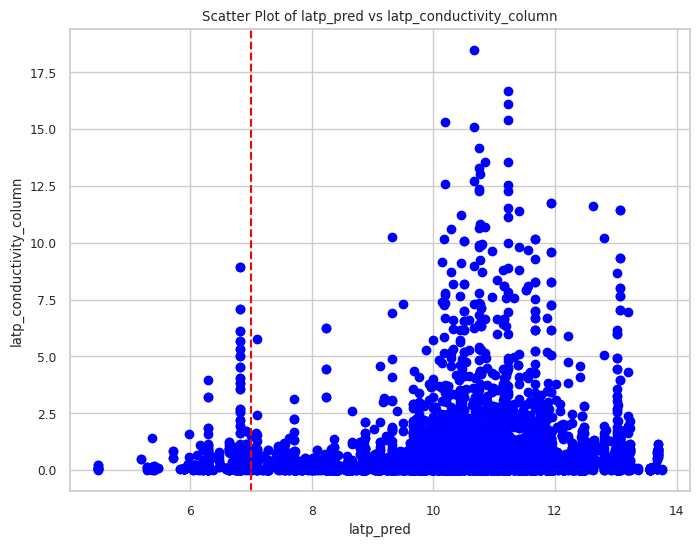

In [51]:
# 绘制图像，横轴是热膨胀系数，纵轴是锂离子电导率
x = latp_pred
y = 10**latp_conductivity_column * 1000
plt.figure(figsize=(8, 6))  # 设定图形大小
plt.scatter(x, y, color='blue', marker='o')  # 绘制散点
plt.axvline(x=7, color='red', linestyle='--', label='x = 7')  # 红色虚线

plt.title('Scatter Plot of latp_pred vs latp_conductivity_column')  # 图标题
plt.xlabel('latp_pred')  # x轴标签
plt.ylabel('latp_conductivity_column')  # y轴标签
plt.grid(True)  # 显示网格
plt.show()  # 显示图形

# 寻找 电导率 与 热膨胀系数 综合最优

In [55]:
data_conductivity_TX = pd.DataFrame({'thermal_expansion': latp_pred, 'formula': latp_formula_column, 'original_formula': latp_original_formula_column})
data_conductivity_TX['conductivity'] = latp_conductivity_column
data_conductivity_TX.head()

# 目标值
target_value = 7

# 计算 A 与目标值的绝对差
data_conductivity_TX['abs_diff'] = (data_conductivity_TX['thermal_expansion'] - 7).abs()

# 找到对于每个 B 值，C 值最小的行
def find_min_C(group):
    return group[group['abs_diff'] == group['abs_diff'].min()]

result = data_conductivity_TX.groupby('conductivity').apply(find_min_C).reset_index(drop=True)

result['conductivity'] = 10 ** result['conductivity'] * 1000
# print(result[['thermal_expansion', 'conductivity', 'abs_diff']])

filter_result = result[(result['thermal_expansion'] > 6.5) & (result['thermal_expansion'] < 7.5)].sort_values(by='conductivity', ascending=False).head(10)

print(filter_result[['thermal_expansion', 'conductivity', 'abs_diff', 'formula', 'original_formula']])

      thermal_expansion  conductivity  abs_diff  \
8877           6.825333      8.957662  0.174667   
8876           6.825333      8.957662  0.174667   
8832           6.825333      7.090740  0.174667   
8831           6.825333      7.090740  0.174667   
8790           6.825333      6.109920  0.174667   
8789           6.825333      6.109920  0.174667   
8782           7.092000      5.768072  0.092000   
8779           6.825333      5.692758  0.174667   
8778           6.825333      5.692758  0.174667   
8773           6.825333      5.327833  0.174667   

                                            formula  \
8877  Li0.1429Sc0.0504B0.0420Ti0.0084P0.1513O0.6050   
8876  Li0.1429B0.0420Sc0.0504Ti0.0084P0.1513O0.6050   
8832  Li0.1429Sc0.0672B0.0252Ti0.0084P0.1513O0.6050   
8831  Li0.1429B0.0252Sc0.0672Ti0.0084P0.1513O0.6050   
8790  Li0.1356Sc0.0508B0.0339Ti0.0169P0.1525O0.6102   
8789  Li0.1356B0.0339Sc0.0508Ti0.0169P0.1525O0.6102   
8782  Li0.1053B0.0175Sc0.0351Ti0.0526P0.1579O0.6316  

In [57]:
# 找电导率最高的54个结构
result_54 = data_conductivity_TX.sort_values(by='conductivity',ascending=False).head(54)
result_54['conductivity'] = 10 ** result_54['conductivity'] * 1000
result_54


,thermal_expansion,formula,original_formula,conductivity,abs_diff
0,10.669333,Li0.1053B0.0439Ga0.0088Ti0.0526P0.1579O0.6316,Li2.0B0.8333Ga0.1667Ti1.0P3O12,18.478041,3.669333
461,11.228667,Li0.1053B0.0439Fe0.0088Ti0.0526P0.1579O0.6316,Li2.0B0.8333Fe0.1667Ti1.0P3O12,16.678409,4.228667
471,11.228667,Li0.1053B0.0439As0.0088Ti0.0526P0.1579O0.6316,Li2.0B0.8333As0.1667Ti1.0P3O12,16.089917,4.228667
472,11.228667,Li0.1053B0.0439Mn0.0088Ti0.0526P0.1579O0.6316,Li2.0B0.8333Mn0.1667Ti1.0P3O12,15.385551,4.228667
1586,10.184889,Li0.0893B0.0268Ga0.0089Ti0.0714P0.1607O0.6429,Li1.6667B0.5Ga0.1667Ti1.3333P3O12,15.309339,3.184889
1596,10.669333,Li0.1053B0.0351Ga0.0175Ti0.0526P0.1579O0.6316,Li2.0B0.6667Ga0.3333Ti1.0P3O12,15.084202,3.669333
1597,10.744222,Li0.0893B0.0268As0.0089Ti0.0714P0.1607O0.6429,Li1.6667B0.5As0.1667Ti1.3333P3O12,14.167055,3.744222
2257,11.228667,Li0.1053B0.0439Al0.0088Ti0.0526P0.1579O0.6316,Li2.0B0.8333Al0.1667Ti1.0P3O12,13.564167,4.228667
2261,10.856000,Li0.0973B0.0265Ga0.0177Ti0.0619P0.1593O0.6372,Li1.8333B0.5Ga0.3333Ti1.1667P3O12,13.535989,3.856000
2265,10.744222,Li0.0893B0.0268Fe0.0089Ti0.0714P0.1607O0.6429,Li1.6667B0.5Fe0.1667Ti1.3333P3O12,13.302699,3.744222
